# ***QUESTION 1***

---



---



In [133]:
import pandas as pd
import numpy as np
import torch 
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import OneHotEncoder

In [134]:
abalone_data = pd.read_csv('/content/drive/MyDrive/PRML/Lab 9/abalone.data',
                           names=['Sex', 'Length', 'Diameter', 'Height', 'Whole weigth', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings'],
                           header=None)

abalone_data = pd.get_dummies(abalone_data, columns = ['Sex'])
abalone_y = abalone_data['Rings']
abalone_x = abalone_data.drop(['Rings'], axis=1)

In [135]:
for i in range(len(abalone_y)):
    if 0<abalone_y[i]<9:
        abalone_y[i] = 0
    elif 8<abalone_y[i]<11:
        abalone_y[i] = 1
    else:
        abalone_y[i] = 2 

<ipython-input-135-9f3f98cfc739>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abalone_y[i] = 2
<ipython-input-135-9f3f98cfc739>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abalone_y[i] = 0
<ipython-input-135-9f3f98cfc739>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abalone_y[i] = 1


In [136]:
abalonex_np = abalone_x.to_numpy()
abaloney_np = abalone_y.to_numpy()

In [138]:
from sklearn.model_selection import train_test_split as split

# train_ax, test_ax, train_ay, test_ay = split(abalonex_np, abaloney_np, train_size=1, stratify=abaloney_np)
train_ax = abalonex_np
train_ay = abaloney_np


In [139]:
train_ay

array([2, 0, 1, ..., 1, 1, 2])

In [140]:
class NN(nn.Module):
    def __init__(self, hidden_layer_size=8):
        super(NN, self).__init__()
        self.hidden_1 = nn.Linear(10, hidden_layer_size)
        self.activation_1 = nn.Tanh()
        self.hidden_2 = nn.Linear(10, hidden_layer_size)
        self.activation_2 = nn.Tanh()

        self.output_layer = nn.Linear(hidden_layer_size,3)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x1 = self.activation_1(self.hidden_1(x))
        x2 = self.activation_2(self.hidden_2(x))
        x3 = torch.add(x1, x2)
        result = self.sigmoid(self.output_layer(x3))

        return result

In [141]:
model = NN(hidden_layer_size = 16)

In [142]:
learning_rate = 0.01
num_epochs = 500

In [143]:
import torch.optim as optim

optim_ = torch.optim.Adam(model.parameters(), lr=learning_rate)
loss_function = torch.nn.CrossEntropyLoss()

best_acc = 0
best_model = None

train_loss, train_acc= list(), list()

In [144]:
for epoch in range(num_epochs):

    train_accuracy = 0.0
    run_time_loss = 0.0

    # print(train_ay)
    
    inputs = Variable(torch.FloatTensor(train_ax))
    labels = Variable(torch.LongTensor(train_ay))

    optim_.zero_grad()
    outputs = model(inputs)

    loss = loss_function(outputs, labels)
    loss.backward()
    optim_.step()

    run_time_loss += loss.item()

    output_labels = []

    
    for i in range(outputs.size()[0]):
        max = 0
        for i in (0, 1, 2):
            if outputs[0][i]>max:
                max = outputs[0][i]
                pred = i

        output_labels.append(pred)

    # print(output_labels, outputs, labels)

    correct = 0
    for i in range(len(labels)):
        if output_labels[i] == labels[i]:
            # print(output_labels[i], labels[i].item())
            correct += 1
            # print(correct)

    # print(correct)


    train_accuracy = correct/len(labels)

    train_acc.append(train_accuracy)
    train_loss.append(run_time_loss) 
    print(f'Epoch:{epoch+1} | Loss: {run_time_loss} | Train Accuracy: {train_accuracy*100}')

Epoch:1 | Loss: 1.0973185300827026 | Train Accuracy: 31.67344984438592
Epoch:2 | Loss: 1.088194727897644 | Train Accuracy: 31.67344984438592
Epoch:3 | Loss: 1.0798016786575317 | Train Accuracy: 31.67344984438592
Epoch:4 | Loss: 1.0720874071121216 | Train Accuracy: 34.64208762269572
Epoch:5 | Loss: 1.064916968345642 | Train Accuracy: 34.64208762269572
Epoch:6 | Loss: 1.0580754280090332 | Train Accuracy: 34.64208762269572
Epoch:7 | Loss: 1.0513436794281006 | Train Accuracy: 34.64208762269572
Epoch:8 | Loss: 1.0445518493652344 | Train Accuracy: 34.64208762269572
Epoch:9 | Loss: 1.0375992059707642 | Train Accuracy: 34.64208762269572
Epoch:10 | Loss: 1.03044593334198 | Train Accuracy: 34.64208762269572
Epoch:11 | Loss: 1.0231086015701294 | Train Accuracy: 34.64208762269572
Epoch:12 | Loss: 1.0156477689743042 | Train Accuracy: 34.64208762269572
Epoch:13 | Loss: 1.0081591606140137 | Train Accuracy: 34.64208762269572
Epoch:14 | Loss: 1.0007612705230713 | Train Accuracy: 34.64208762269572
Epoch

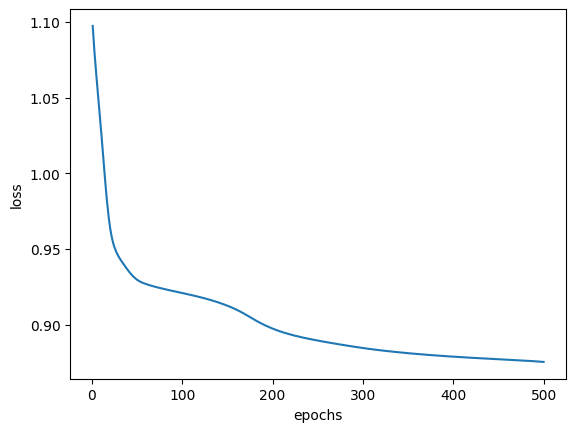

In [145]:
import matplotlib.pyplot as plt

plt.plot([i for i in range(1, num_epochs+1)], train_loss)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

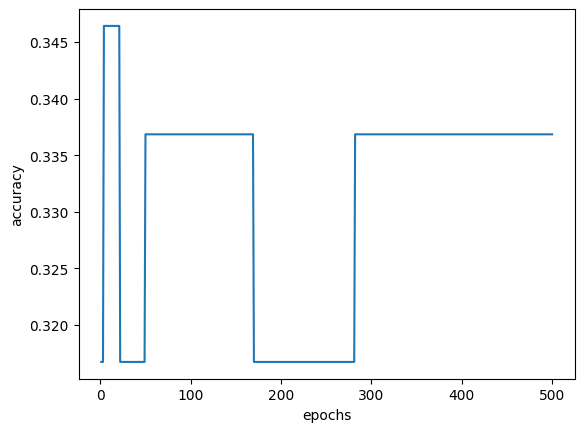

In [146]:
plt.plot([i for i in range(1, num_epochs+1)], train_acc)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()